# Jaccard指数与准确率的比较

根据具体用例，某些指标在确定分割质量时可能并不理想。我们通过比较不同裁剪图像的分割结果来演示这一点。

另请参阅：
* [Maier-Hein, Reinke等人（Arxiv 2023）。指标重载：图像分析验证的陷阱和建议
](https://arxiv.org/abs/2206.01653)

In [1]:
from skimage.data import human_mitosis
from the_segmentation_game import metrics
import napari_segment_blobs_and_things_with_membranes as nsbatwm
import stackview

我们使用scikit-image中的`human_mitosis`示例数据集。

StackViewNDArray([[10, 11,  9, ..., 11, 11, 10],
                  [10, 10, 11, ..., 12, 12, 11],
                  [ 9,  9, 10, ..., 12, 11, 11],
                  ...,
                  [10,  9,  9, ..., 11, 12, 11],
                  [10, 10, 10, ..., 13, 12, 12],
                  [10, 10, 10, ..., 13, 13, 13]], dtype=uint8)
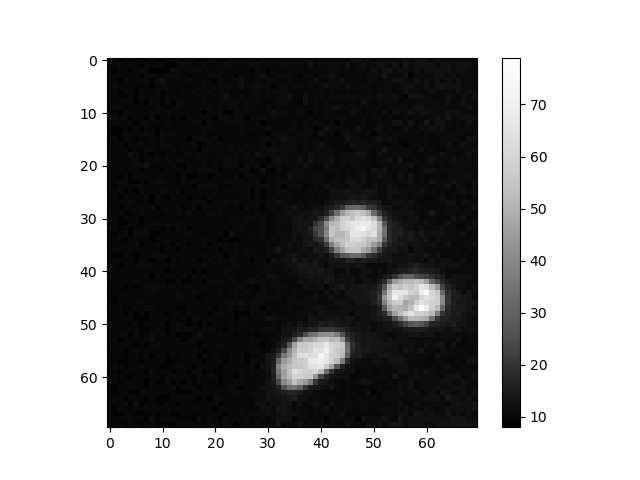
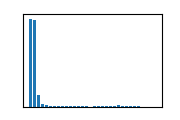

In [2]:
image = human_mitosis()[95:165, 384:454]

stackview.insight(image)

让我们假设这是由专家执行的参考标注。

StackViewNDArray([[0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]])
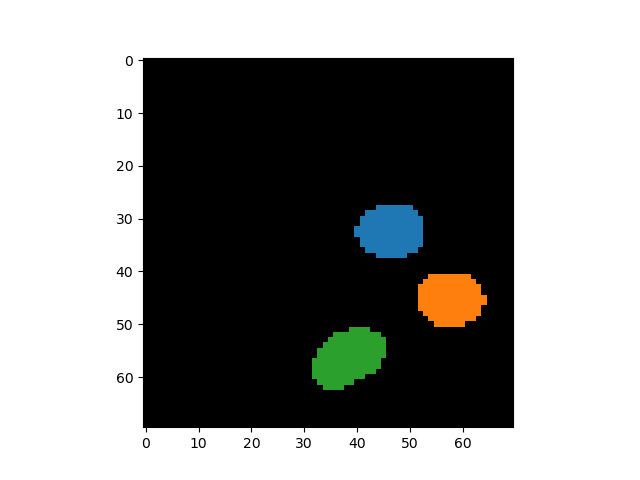

In [3]:
reference_labels = nsbatwm.voronoi_otsu_labeling(image)
reference_labels

此外，这创建了一个我们想要确定质量的分割结果。

StackViewNDArray([[0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]])
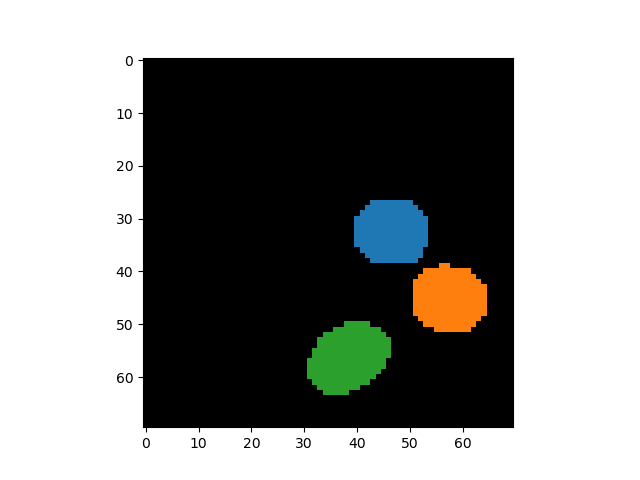

In [4]:
test_labels = nsbatwm.gauss_otsu_labeling(image, outline_sigma=3)

test_labels

## 质量测量
有许多质量指标可用于衡量两个标签图像之间的匹配程度。在接下来的内容中，我们使用[The Segmentation Game中实现的准确率和Jaccard指数](https://github.com/haesleinhuepf/the-segmentation-game#metrics)，这是一个用于测量分割结果质量指标的napari插件。

In [5]:
metrics.roc_accuracy_binary(reference_labels, test_labels)

0.9744898

In [6]:
metrics.jaccard_index_sparse(reference_labels, test_labels)

0.7274754206261056

现在，我们将再次对标签图像应用相同的指标，但通过移除标签图像顶部和左侧的一些零值像素来裁剪图像。

In [7]:
metrics.roc_accuracy_binary(reference_labels[20:,20:], test_labels[20:,20:])

0.95

In [8]:
metrics.jaccard_index_sparse(reference_labels[20:,20:], test_labels[20:,20:])

0.7274754206261056

如你所见，准确率指标发生了变化，而Jaccard指数保持不变。显然，准确率指标取决于标签图像中零值像素的数量。我们只是可视化裁剪后的图像：

StackViewNDArray([[0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]])
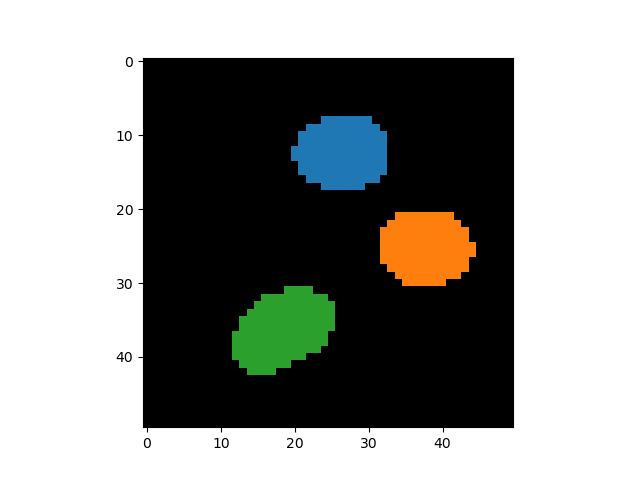

In [9]:
reference_labels[20:,20:]

StackViewNDArray([[0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]])
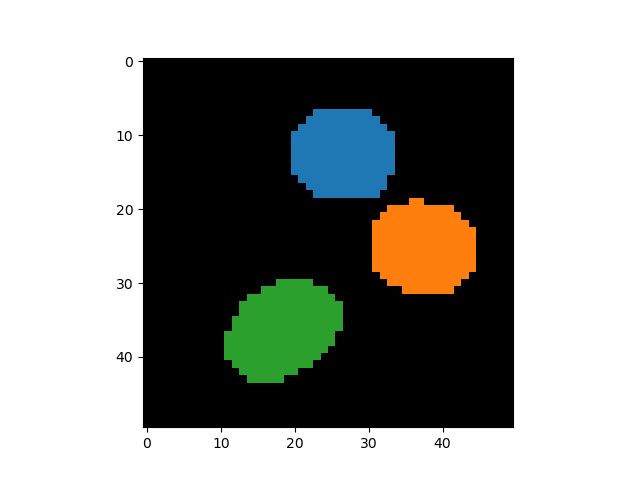

In [10]:
test_labels[20:,20:]

## 解释
比较准确率$A$和Jaccard指数$J$的方程时，很明显两者做的是类似的事情，但只有准确率包括了两个标签图像中的零值像素数量。这些像素是真负例$TN$。

$$
  A =\frac{TP + TN}{FN + FP + TP + TN}
$$

$$
  J =\frac{TP}{FN + FP + TP}
$$